In [301]:
import pandas as pd

In [305]:
df = pd.read_csv("Heart_Disease_Prediction.csv")


In [307]:
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [309]:
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [311]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [313]:
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [315]:
print(df.dtypes[df.dtypes == 'object'])

Heart Disease    object
dtype: object


In [317]:
df = df.replace({"Yes": 1, "No": 0})

In [319]:
df = pd.get_dummies(df, drop_first=True)

In [321]:
from sklearn.model_selection import train_test_split

In [327]:
X = df.drop(columns=["Heart Disease_Presence"]) 
y = df["Heart Disease_Presence"]  

In [325]:
print(df.columns)


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Presence'],
      dtype='object')


In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [331]:
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (216, 13), Testing data: (54, 13)


In [333]:
from sklearn.linear_model import LogisticRegression


In [335]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [337]:
y_pred = model.predict(X_test)

In [339]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [341]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


In [343]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[32  1]
 [ 3 18]]


In [345]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94        33
        True       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [347]:
from sklearn.metrics import precision_recall_curve

In [349]:
y_prob = model.predict_proba(X_test)[:, 1]


In [351]:
y_pred_adjusted = (y_prob > 0.4).astype(int)

In [353]:
print("Classification Report (After Adjusting Threshold):")
print(classification_report(y_test, y_pred_adjusted))

Classification Report (After Adjusting Threshold):
              precision    recall  f1-score   support

       False       0.91      0.91      0.91        33
        True       0.86      0.86      0.86        21

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



In [355]:
import joblib

In [357]:
joblib.dump(model, "heart_disease_model.pkl")


['heart_disease_model.pkl']

In [359]:
model = joblib.load("heart_disease_model.pkl")

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [366]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


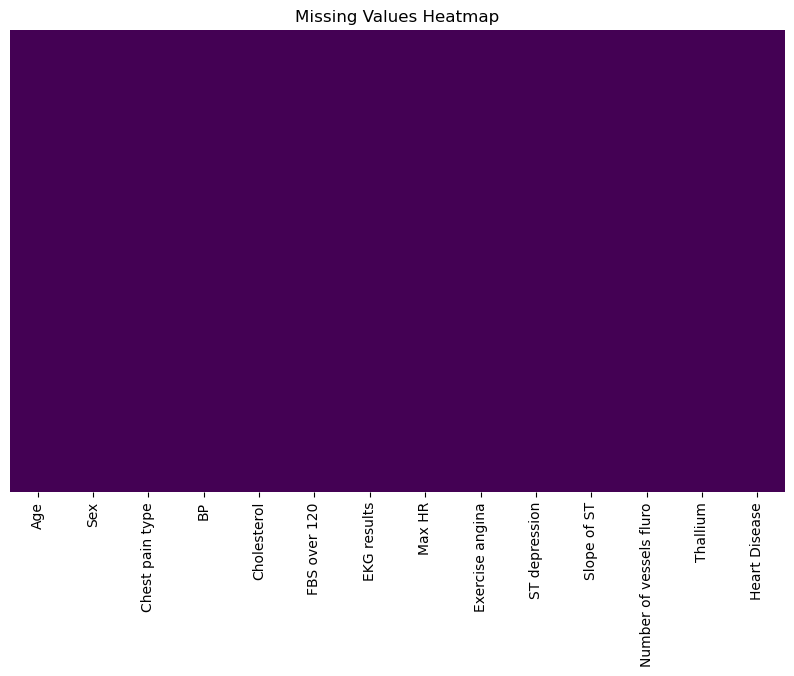

In [368]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

/var/folders/4w/2d6g49b93cl3_s7fx875_t340000gn/T/ipykernel_67137/2609818511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df, palette="coolwarm")


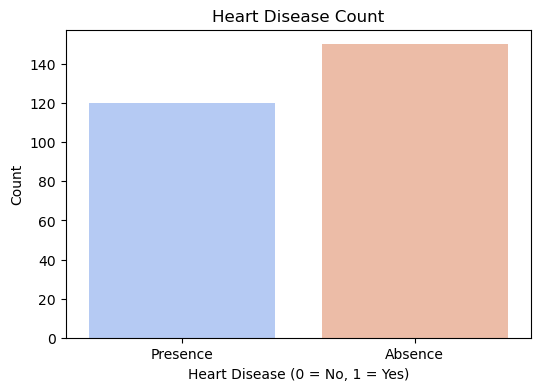

In [370]:
plt.figure(figsize=(6,4))
sns.countplot(x="Heart Disease", data=df, palette="coolwarm")
plt.title("Heart Disease Count")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

/var/folders/4w/2d6g49b93cl3_s7fx875_t340000gn/T/ipykernel_67137/2609818511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df, palette="coolwarm")


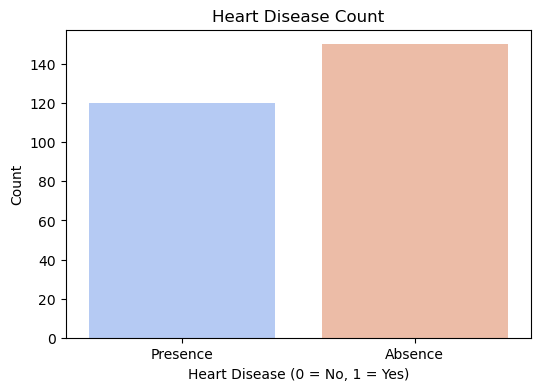

In [374]:
plt.figure(figsize=(6,4))
sns.countplot(x="Heart Disease", data=df, palette="coolwarm")
plt.title("Heart Disease Count")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [384]:
df_numeric = df.select_dtypes(include=['number'])


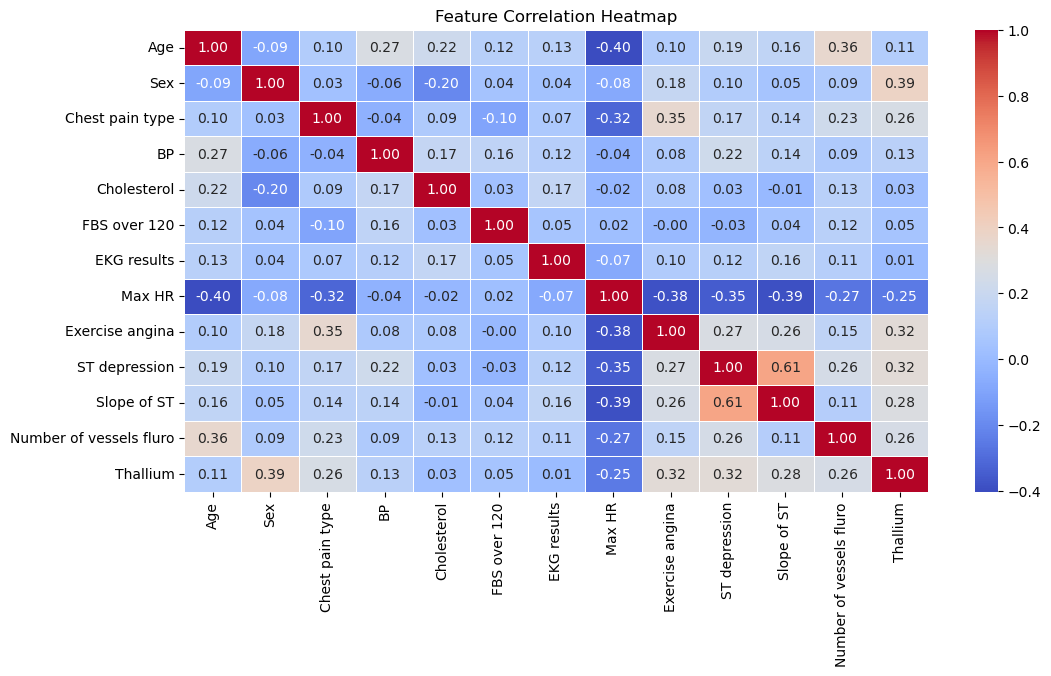

In [386]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

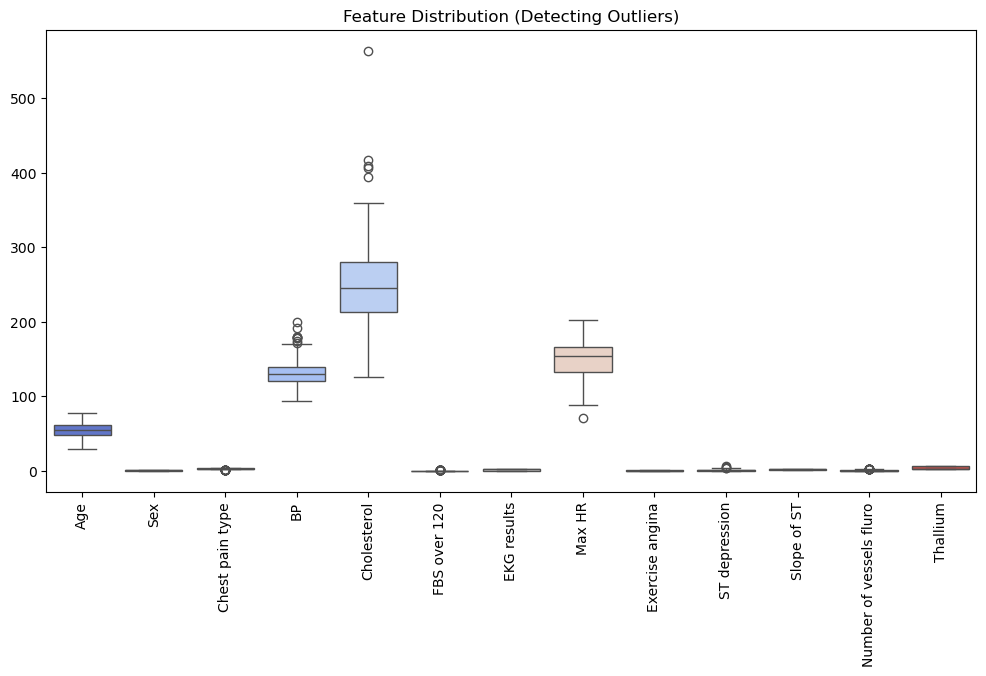

In [388]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Feature Distribution (Detecting Outliers)")
plt.show()

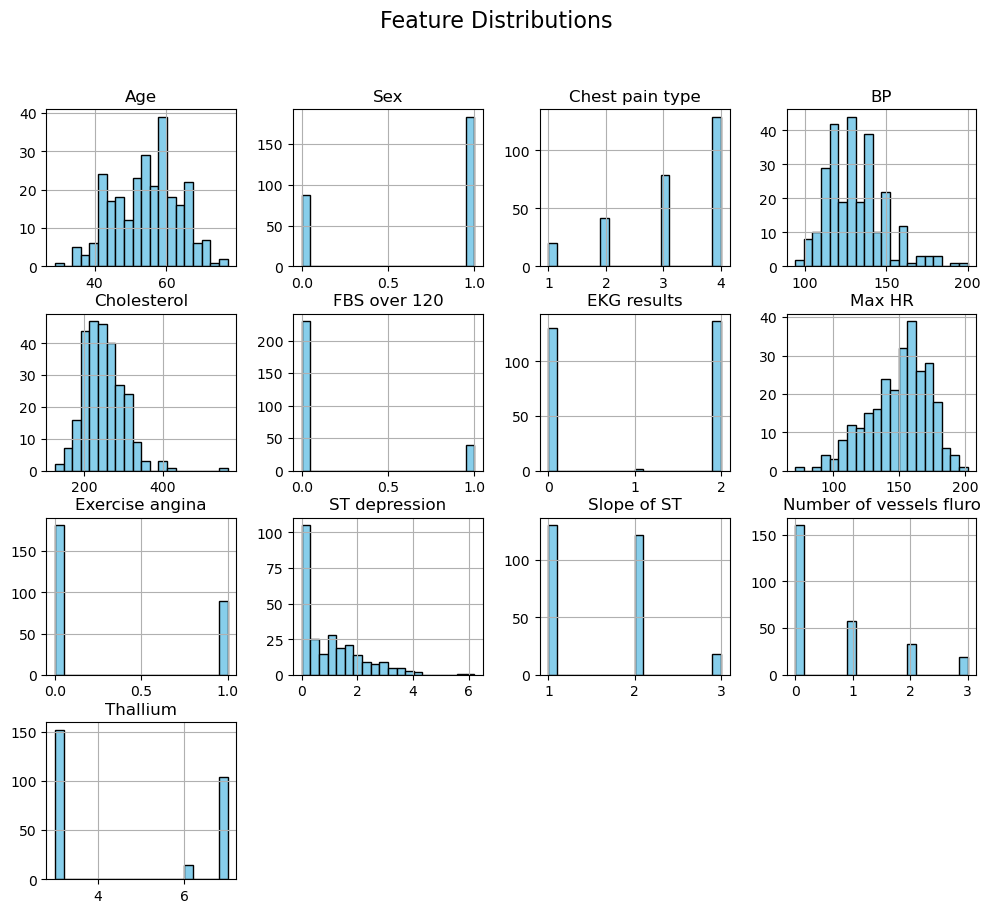

In [390]:
df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()